## Introducción al Proyecto de Segmentación de Clientes

Este proyecto tiene como objetivo realizar una segmentación de clientes utilizando técnicas de aprendizaje automático no supervisado. El conjunto de datos proporcionado incluye varias características de los clientes, como salario, edad, región geográfica, y comportamiento de los productos. Estas características se utilizarán para agrupar a los clientes en segmentos distintos.

La segmentación de clientes es una estrategia crucial en marketing y ventas que permite a las empresas entender mejor las necesidades y comportamientos de sus clientes, lo que a su vez les permite ofrecer productos y servicios más personalizados. Esto puede resultar en una mayor satisfacción del cliente y, en última instancia, en un aumento de las ventas y los ingresos.

El proyecto se divide en varias etapas:

1. **Preprocesamiento de datos**: Los datos brutos se limpian y transforman para su análisis. Esto puede implicar tratar con valores perdidos, convertir datos categóricos en un formato numérico, y normalizar las características numéricas.

2. **Modelado**: Utilizamos el algoritmo KMeans, una técnica de clustering popular en aprendizaje automático no supervisado, para agrupar a los clientes en segmentos basados en sus características. Determinamos el número óptimo de clusters utilizando el método del codo.

3. **Análisis de Clusters**: Una vez que los clusters están formados, realizamos un análisis para entender las características clave de cada grupo. Esto se realiza generando un resumen estadístico de cada cluster.

4. **Exportación de Resultados**: Finalmente, los resultados del análisis se exportan para su uso en otras aplicaciones, como campañas de marketing personalizadas o análisis de ventas.

Al final del proyecto, tendremos un entendimiento más profundo de los diversos segmentos de clientes y podremos tomar decisiones de negocio más informadas.

Trabajo realizado por:
* **Mariela Drago**
* **Francisco Javier Camacho**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Importación de librerías,configuración del entorno y carga de datos

In [ ]:
# Importamos las librerías necesarias y configuramos el entorno

# silence warnings
import warnings
warnings.filterwarnings("ignore")

# operating system
import os

# time calculation to track some processes
import time

# numeric and matrix operations
import numpy as np
import pandas as pd

# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# python core library for machine learning and data science
import sklearn
from sklearn import set_config
set_config(transform_output = "pandas")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans

In [ ]:
# Cargamos los datos
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MDS - Grupo 7/Capstone/Dataset para trabajar 04.07/informacion_clientes_sin_salario.csv')

In [ ]:
# Visualizamos los primeros registros
df.head().T

,0,1,2,3,4
pk_cid,1375586,1050611,1050612,1050613,1050614
pk_partition,2018-01-01,2018-01-01,2018-01-01,2018-01-01,2018-01-01
entry_date,2018-01-01,2015-08-01,2015-08-01,2015-08-01,2015-08-01
entry_channel,KHL,KHE,KHE,KHD,KHE
active_customer,1,0,0,0,1
segment,02 - PARTICULARES,03 - UNIVERSITARIO,03 - UNIVERSITARIO,03 - UNIVERSITARIO,03 - UNIVERSITARIO
short_term_deposit,0,0,0,1,0
loans,0,0,0,0,0
mortgage,0,0,0,0,0
funds,0,0,0,0,0


## 2. Preprocesamiento de datos

In [ ]:
# Verificamos la cantidad de valores nulos
df.isnull().sum()

pk_cid                          0
pk_partition                    0
entry_date                      0
entry_channel                   0
active_customer                 0
segment                         0
short_term_deposit              0
loans                           0
mortgage                        0
funds                           0
securities                      0
long_term_deposit               0
credit_card                     0
payroll                         0
pension_plan                    0
payroll_account                 0
emc_account                     0
debit_card                      0
em_acount                       0
country_id                      0
region_code                     0
gender                          0
age                             0
deceased                        0
salary                    1541104
Suma_productos_activos          0
d_cliente                       0
dtype: int64

In [ ]:
# Rellenamos los valores nulos de la columna 'salary' con 0
df['salary'].fillna(0, inplace=True)

In [ ]:
# Verificamos de nuevo la cantidad de valores nulos
df.isnull().sum()

pk_cid                    0
pk_partition              0
entry_date                0
entry_channel             0
active_customer           0
segment                   0
short_term_deposit        0
loans                     0
mortgage                  0
funds                     0
securities                0
long_term_deposit         0
credit_card               0
payroll                   0
pension_plan              0
payroll_account           0
emc_account               0
debit_card                0
em_acount                 0
country_id                0
region_code               0
gender                    0
age                       0
deceased                  0
salary                    0
Suma_productos_activos    0
d_cliente                 0
dtype: int64

In [ ]:
# Eliminamos los registros donde la columna 'deceased' es igual a 'N'
df = df[df["deceased"]=="N"]

In [ ]:
# Agrupamos el dataframe por 'pk_cid' y calculamos ciertas funciones de agregación para las demás columnas
df_grouped = df.groupby('pk_cid').agg({
    'age': 'max',
    'salary': 'mean',
    'segment': 'last',
    'region_code': 'first',
    'Suma_productos_activos':'max',
    'active_customer':'max',
    'd_cliente':'max'

}).reset_index()

In [ ]:
# Creamos un diccionario para mapear los códigos de región a las provincias
region_to_province = {
    1.0: 'Álava',
    2.0: 'Albacete',
    3.0: 'Alicante',
    4.0: 'Almería',
    5.0: 'Ávila',
    6.0: 'Badajoz',
    7.0: 'Baleares',
    8.0: 'Barcelona',
    9.0: 'Burgos',
    10.0: 'Cáceres',
    11.0: 'Cádiz',
    12.0: 'Castellón',
    13.0: 'Ciudad Real',
    14.0: 'Córdoba',
    15.0: 'La Coruña',
    16.0: 'Cuenca',
    17.0: 'Gerona',
    18.0: 'Granada',
    19.0: 'Guadalajara',
    20.0: 'Guipúzcoa',
    21.0: 'Huelva',
    22.0: 'Huesca',
    23.0: 'Jaén',
    24.0: 'León',
    25.0: 'Lérida',
    26.0: 'La Rioja',
    27.0: 'Lugo',
    28.0: 'Madrid',
    29.0: 'Málaga',
    30.0: 'Murcia',
    31.0: 'Navarra',
    32.0: 'Orense',
    33.0: 'Asturias',
    34.0: 'Palencia',
    35.0: 'Las Palmas',
    36.0: 'Pontevedra',
    37.0: 'Salamanca',
    38.0: 'Santa Cruz de Tenerife',
    39.0: 'Cantabria',
    40.0: 'Segovia',
    41.0: 'Sevilla',
    42.0: 'Soria',
    43.0: 'Tarragona',
    44.0: 'Teruel',
    45.0: 'Toledo',
    46.0: 'Valencia',
    47.0: 'Valladolid',
    48.0: 'Vizcaya',
    49.0: 'Zamora',
    50.0: 'Zaragoza',
    51.0: 'Ceuta',
    52.0: 'Melilla',
}

In [ ]:
# Función para mapear códigos de región a provincias
def map_province(code):
    try:
        float_code = float(code)
        return region_to_province.get(float_code, 'Otros')
    except ValueError:
        return 'Otros'

# Aplicar la función a la columna 'region_code'
df_grouped['province'] = df_grouped['region_code'].apply(map_province)


In [ ]:
df_grouped['province'].value_counts()

Madrid                    98159
Barcelona                 46085
Valencia                  27713
Murcia                    21762
Sevilla                   21308
La Coruña                 18135
Málaga                    13599
Alicante                  13476
Pontevedra                12682
Cádiz                     11751
Asturias                  10137
Zaragoza                   9946
Las Palmas                 9490
Badajoz                    8771
Valladolid                 8397
Toledo                     7802
Granada                    7720
Salamanca                  6595
Cáceres                    5835
Córdoba                    5671
Cantabria                  5482
Baleares                   5265
Albacete                   5240
Ciudad Real                5084
Huelva                     5040
Castellón                  5003
Tarragona                  4670
Orense                     3871
Gerona                     3844
Lugo                       3730
Burgos                     3575
Lérida  

In [ ]:
# Calcular el conteo de registros por provincia
province_counts = df_grouped['province'].value_counts()

# Identificar las provincias con menos de 3000 registros
small_provinces = province_counts[province_counts < 3000].index

# Asignar estas provincias a 'Otros'
df_grouped.loc[df_grouped['province'].isin(small_provinces), 'province'] = 'Otros'


In [ ]:
df_grouped['province'].value_counts()

Madrid         98159
Barcelona      46085
Otros          37075
Valencia       27713
Murcia         21762
Sevilla        21308
La Coruña      18135
Málaga         13599
Alicante       13476
Pontevedra     12682
Cádiz          11751
Asturias       10137
Zaragoza        9946
Las Palmas      9490
Badajoz         8771
Valladolid      8397
Toledo          7802
Granada         7720
Salamanca       6595
Cáceres         5835
Córdoba         5671
Cantabria       5482
Baleares        5265
Albacete        5240
Ciudad Real     5084
Huelva          5040
Castellón       5003
Tarragona       4670
Orense          3871
Gerona          3844
Lugo            3730
Burgos          3575
Lérida          3405
Name: province, dtype: int64

In [ ]:
# Eliminar la columna 'region_code'
df_grouped = df_grouped.drop('region_code', axis=1)

# Reiniciar el índice
df_grouped = df_grouped.reset_index(drop=True)

In [ ]:
# Aplicamos one-hot encoding a las columnas 'segment' y 'province'
df_grouped = pd.get_dummies(df_grouped, columns=['segment', 'province'])

## 3. Selección de número de clústeres y modelado

In [ ]:
# Buscamos el número óptimo de clústeres usando el método del codo
sse = {}

for k in range(2, 15):

    print(f"Fitting pipe with {k} clusters")

    clustering_model = KMeans(n_clusters = k)
    clustering_model.fit(df_grouped)

    sse[k] = clustering_model.inertia_

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Fitting pipe with 10 clusters
Fitting pipe with 11 clusters
Fitting pipe with 12 clusters
Fitting pipe with 13 clusters
Fitting pipe with 14 clusters


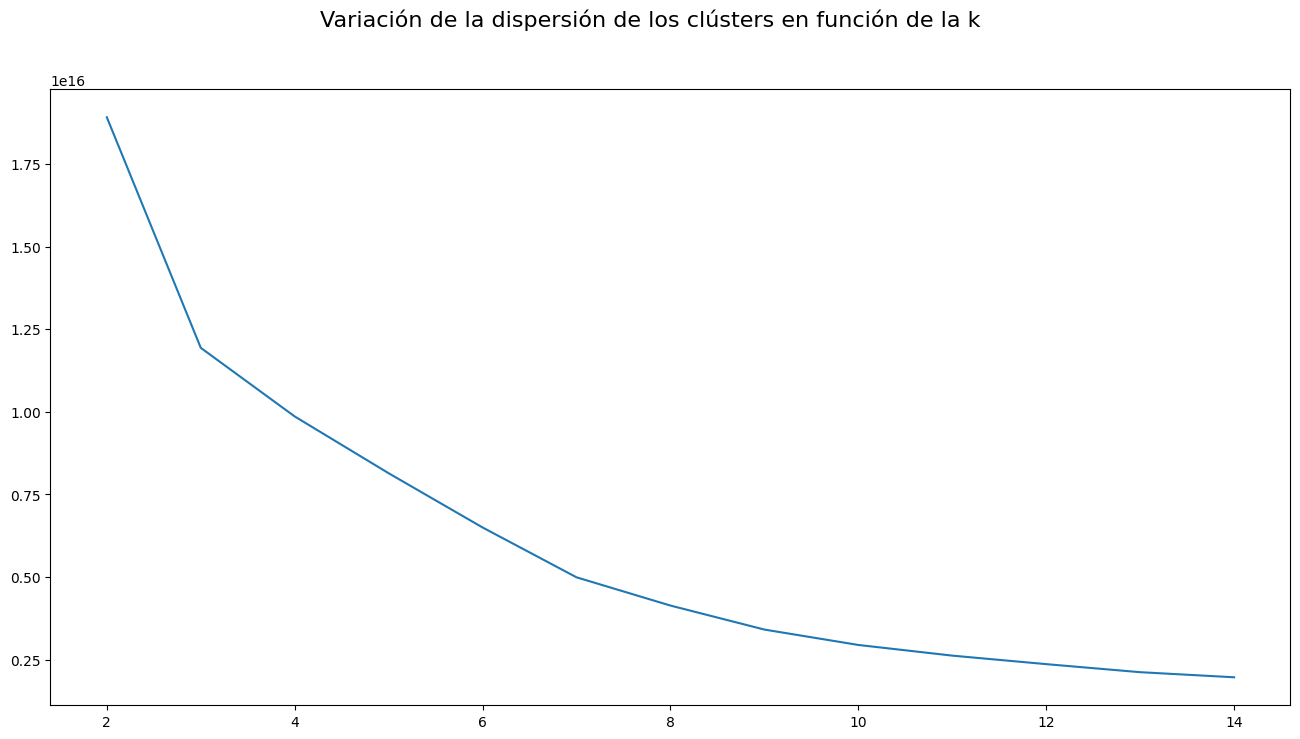

In [ ]:
# Graficamos la dispersión de los clústeres en función de k
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

x_values = list(sse.keys())
y_values = list(sse.values())

ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

In [ ]:
# Creamos un pipeline para aplicar RobustScaler y KMeans
pipe = Pipeline(steps = [
     ("RobustScaler", RobustScaler(quantile_range = (0, 99.0))),
     ("Clustering", KMeans(n_clusters = 5, random_state = 175))
])

In [ ]:
# Entrenamos el pipeline
pipe.fit(df_grouped)

Pipeline(steps=[('RobustScaler', RobustScaler(quantile_range=(0, 99.0))),
                ('Clustering', KMeans(n_clusters=5, random_state=175))])

In [ ]:
# Definimos X_processed
X_processed = df_grouped

In [ ]:
# Predecimos los clústeres
labels = pipe.predict(df_grouped)

In [ ]:
# Añadimos la columna 'cluster' al dataframe
X_processed["cluster"] = labels

In [ ]:
X_processed.shape

(456318, 44)

In [ ]:
X_processed.head()

,pk_cid,age,salary,Suma_productos_activos,active_customer,d_cliente,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,segment_no_indica,...,province_Otros,province_Pontevedra,province_Salamanca,province_Sevilla,province_Tarragona,province_Toledo,province_Valencia,province_Valladolid,province_Zaragoza,cluster
0,15891,59,0.0,1,1,31,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
1,16063,62,0.0,0,1,181,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
2,16203,70,0.0,1,1,151,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,16502,58,0.0,2,1,242,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
4,17457,54,102406.0,3,1,607,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
X_processed.head(1).T

,0
pk_cid,15891.0
age,59.0
salary,0.0
Suma_productos_activos,1.0
active_customer,1.0
d_cliente,31.0
segment_01 - TOP,0.0
segment_02 - PARTICULARES,1.0
segment_03 - UNIVERSITARIO,0.0
segment_no_indica,0.0


## 4. Ficha resumen de los clientes

In [ ]:
ficha_df = pd.DataFrame()

In [ ]:
# Selecciona las columnas dummy de 'province' en df_grouped
province_columns = [col for col in df_grouped.columns if 'province_' in col]
province_data = df_grouped.loc[:, province_columns]

In [ ]:
# Creamos una ficha resumen de cada grupo
for i, col in enumerate(["salary", "age", "d_cliente", "Suma_productos_activos", "segment_01 - TOP", "segment_02 - PARTICULARES", "segment_03 - UNIVERSITARIO", "segment_no_indica", "active_customer", 'province_Alicante', 'province_Asturias', 'province_Barcelona', 'province_Cádiz', 'province_La Coruña', 'province_Las Palmas', 'province_Madrid', 'province_Murcia', 'province_Málaga', 'province_Otros', 'province_Pontevedra', 'province_Sevilla', 'province_Valencia', 'province_Zaragoza']):
    resumen_data = X_processed[["cluster", col]].groupby("cluster").describe().T[1:]
    ficha_df = ficha_df.append(resumen_data)

In [ ]:
ficha_df.tail(21)

cluster                        0         1         2         3         4
province_Sevilla  mean  0.000140  0.045764  0.044196  0.042642  0.065463
                  std   0.011831  0.208975  0.205532  0.202050  0.247342
                  min   0.000000  0.000000  0.000000  0.000000  0.000000
                  25%   0.000000  0.000000  0.000000  0.000000  0.000000
                  50%   0.000000  0.000000  0.000000  0.000000  0.000000
                  75%   0.000000  0.000000  0.000000  0.000000  0.000000
                  max   1.000000  1.000000  1.000000  1.000000  1.000000
province_Valencia mean  0.000020  0.057906  0.063606  0.056323  0.082220
                  std   0.004472  0.233568  0.244051  0.230546  0.274701
                  min   0.000000  0.000000  0.000000  0.000000  0.000000
                  25%   0.000000  0.000000  0.000000  0.000000  0.000000
                  50%   0.000000  0.000000  0.000000  0.000000  0.000000
                  75%   0.000000  0.000000  0.000000  0.000000  0.000000
                  max   1.000000  1.000000  1.000000  1.000000  1.000000
province_Zaragoza mean  0.000060  0.017070  0.031285  0.017565  0.028475
                  std   0.007745  0.129535  0.174089  0.131365  0.166327
                  min   0.000000  0.000000  0.000000  0.000000  0.000000
                  25%   0.000000  0.000000  0.000000  0.000000  0.000000
                  50%   0.000000  0.000000  0.000000  0.000000  0.000000
                  75%   0.000000  0.000000  0.000000  0.000000  0.000000
                  max   1.000000  1.000000  1.000000  1.000000  1.000000

In [ ]:
# Generamos un multiindex para la ficha resumen
out_index = [
    "Cluster_1",
    "Cluster_2",
    "Cluster_3",
    "Cluster_4",
    "Cluster_5",

]

inner_index = [
    "Margen",
    "Salario",
    "Edad",
    "Días como clientes",
    "Productos activos",
    "segment_01 - TOP",
    "segment_02 - PARTICULARES",
    "segment_03 - UNIVERSITARIO",
    "segment_no_indica",
    "active_customer"
]

estadisticos = ["Media", "Desviación", "Mínimo", "Perc. 25", "Perc. 50", "Perc. 75", "Máximo"]


new_multi_index = []

for oi, ii, in zip(out_index, inner_index):
    for es in estadisticos:
        new_multi_index.append((oi, ii, es))

In [ ]:
new_multi_index

[('Cluster_1', 'Margen', 'Media'),
 ('Cluster_1', 'Margen', 'Desviación'),
 ('Cluster_1', 'Margen', 'Mínimo'),
 ('Cluster_1', 'Margen', 'Perc. 25'),
 ('Cluster_1', 'Margen', 'Perc. 50'),
 ('Cluster_1', 'Margen', 'Perc. 75'),
 ('Cluster_1', 'Margen', 'Máximo'),
 ('Cluster_2', 'Salario', 'Media'),
 ('Cluster_2', 'Salario', 'Desviación'),
 ('Cluster_2', 'Salario', 'Mínimo'),
 ('Cluster_2', 'Salario', 'Perc. 25'),
 ('Cluster_2', 'Salario', 'Perc. 50'),
 ('Cluster_2', 'Salario', 'Perc. 75'),
 ('Cluster_2', 'Salario', 'Máximo'),
 ('Cluster_3', 'Edad', 'Media'),
 ('Cluster_3', 'Edad', 'Desviación'),
 ('Cluster_3', 'Edad', 'Mínimo'),
 ('Cluster_3', 'Edad', 'Perc. 25'),
 ('Cluster_3', 'Edad', 'Perc. 50'),
 ('Cluster_3', 'Edad', 'Perc. 75'),
 ('Cluster_3', 'Edad', 'Máximo'),
 ('Cluster_4', 'Días como clientes', 'Media'),
 ('Cluster_4', 'Días como clientes', 'Desviación'),
 ('Cluster_4', 'Días como clientes', 'Mínimo'),
 ('Cluster_4', 'Días como clientes', 'Perc. 25'),
 ('Cluster_4', 'Días como c

In [ ]:
def generate_multiindex(list_of_tuples, names):
    return pd.MultiIndex.from_tuples(list_of_tuples, names = names)

In [ ]:
names = ["Grupo Indicadores", "Indicador", "Estadístico"]

In [ ]:
# Nos aseguramos de que new_multi_index tenga la misma longitud que ficha_df.
print(f"Longitud de new_multi_index: {len(new_multi_index)}")
print(f"Longitud de ficha_df: {len(ficha_df)}")

# Comprueba que generate_multiindex(new_multi_index, names) devuelva un índice de la misma longitud que ficha_df.
index_ficha = generate_multiindex(new_multi_index, names)
print(f"Longitud de index_ficha: {len(index_ficha)}")


Longitud de new_multi_index: 35
Longitud de ficha_df: 161
Longitud de index_ficha: 35


In [ ]:
# Creamos un dataframe con la cantidad de registros por clúster
tamaño_clusters = X_processed.groupby("cluster").size().to_frame().T
tamaño_clusters.set_index(generate_multiindex([("General", "Clúster", "Tamaño")] , names), inplace = True)

In [ ]:
# Unimos los dataframes
ficha_df = tamaño_clusters.append(ficha_df)

In [ ]:
# Renombramos las columnas
ficha_df = ficha_df.rename(columns = {
    0 : "Cluster 1",
    1 : "Cluster 2",
    2 : "Cluster 3",
    3 : "Cluster 4",
    4 : "Cluster 5"
})

In [ ]:
# Agrupamos el dataframe por 'cluster' y calculamos ciertas funciones de agregación para las demás columnas
ficha_df.style.background_gradient(cmap = 'Blues', axis = 1)

cluster,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
"('General', 'Clúster', 'Tamaño')",50007.000000,61686.000000,79238.000000,105037.000000,160350.000000
"('salary', 'mean')",126463.018317,64169.761892,71056.588745,70412.492269,70800.423062
"('salary', 'std')",463095.268688,95012.906591,82379.024119,100919.226785,85245.764343
"('salary', 'min')",0.000000,0.000000,0.000000,0.000000,0.000000
"('salary', '25%')",0.000000,0.000000,0.000000,0.000000,0.000000
"('salary', '50%')",80584.000000,48125.000000,63223.500000,56988.000000,59973.500000
"('salary', '75%')",159903.000000,93947.000000,101974.750000,104491.000000,100317.000000
"('salary', 'max')",28894396.000000,2772111.000000,2768593.000000,5364154.000000,2269600.000000
"('age', 'mean')",24.737617,41.447054,23.765983,42.638632,23.747359
"('age', 'std')",4.877794,13.394350,3.330452,13.596282,2.735485


In [ ]:
X_processed.head()

,pk_cid,age,salary,Suma_productos_activos,active_customer,d_cliente,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,segment_no_indica,...,province_Otros,province_Pontevedra,province_Salamanca,province_Sevilla,province_Tarragona,province_Toledo,province_Valencia,province_Valladolid,province_Zaragoza,cluster
0,15891,59,0.0,1,1,31,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
1,16063,62,0.0,0,1,181,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
2,16203,70,0.0,1,1,151,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,16502,58,0.0,2,1,242,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
4,17457,54,102406.0,3,1,607,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
df_groupedbycluster = X_processed.groupby('cluster').agg({
    'pk_cid': 'count',
    'age': 'mean',
    'salary': 'mean',
    'd_cliente':'mean',
    'Suma_productos_activos':'mean',
    'active_customer':'sum',
    "segment_01 - TOP": 'sum',
    "segment_02 - PARTICULARES": 'sum',
    "segment_03 - UNIVERSITARIO": 'sum',
    "segment_no_indica": 'sum',
    "active_customer": 'sum',
    'province_Alicante': 'sum',
    'province_Asturias': 'sum',
    'province_Barcelona': 'sum',
    'province_Cádiz': 'sum',
    'province_La Coruña': 'sum',
    'province_Las Palmas': 'sum',
    'province_Madrid': 'sum',
    'province_Murcia': 'sum',
    'province_Málaga': 'sum',
    'province_Otros': 'sum',
    'province_Pontevedra': 'sum',
    'province_Sevilla': 'sum',
    'province_Valencia': 'sum',
    'province_Zaragoza': 'sum'

}).reset_index()

In [ ]:
df_groupedbycluster.head().T

,0,1,2,3,4
cluster,0.000000,1.000000,2.000000,3.000000,4.000000
pk_cid,50007.000000,61686.000000,79238.000000,105037.000000,160350.000000
age,24.737617,41.447054,23.765983,42.638632,23.747359
salary,126463.018317,64169.761892,71056.588745,70412.492269,70800.423062
d_cliente,649.120383,677.113024,718.614907,626.021116,797.352909
Suma_productos_activos,0.766993,0.300911,1.371930,2.035511,0.800069
active_customer,13418.000000,0.000000,79238.000000,105037.000000,0.000000
segment_01 - TOP,18.000000,21.000000,0.000000,7510.000000,0.000000
segment_02 - PARTICULARES,44.000000,56245.000000,0.000000,95965.000000,0.000000
segment_03 - UNIVERSITARIO,48028.000000,0.000000,79185.000000,0.000000,160350.000000


## 5. Creamos el dataset con los pk_cid de cada clúster y lo exportamos

In [ ]:
# Creamos un dataframe que asocia cada 'pk_cid' a su respectivo clúster
df_groupedbycidcluster = X_processed.groupby('pk_cid').agg({
    'cluster': 'first',

}).reset_index()

In [ ]:
df_groupedbycidcluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456318 entries, 0 to 456317
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   pk_cid   456318 non-null  int64
 1   cluster  456318 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 5.2 MB


In [ ]:
# Exportamos el dataframe a un archivo .csv
from google.colab import files
df_groupedbycidcluster.to_csv('cidcluster2506.csv', index=False)

In [ ]:
files.download ('cidcluster2506.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>